In [164]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd
from src.PLS.ABC import ABC_rejection
from src.PLS.utils import threshold_scheduler
from src.PLS.utils import beta_sampler

In [165]:
Typ = ["simple","simple_I0","meta"][0]
siz = ["10","100","1000"][1]
reference = [5]

In [166]:
trajs = 1
iterations = 18
meta_iterations = 900

In [167]:
cluster_fittings ={}
cluster_fittings["1000"] = {}
cluster_fittings["100"] = {}
cluster_fittings["10"] = {}
#cluster_fittings["1000"][f"{i}"]

In [168]:
meta_fittings ={}
meta_fittings["1000"] = {}
meta_fittings["100"] = {}
meta_fittings["10"] = {}

In [169]:
if Typ == "simple":
    if siz == "1000":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["1000"][f"{i}"] = total_traj
    elif siz == "100":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_{i}_1_100b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["100"][f"{i}"] = total_traj
    elif siz == "10":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_{i}_1_10b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["10"][f"{i}"] = total_traj
elif Typ == "simple_I0":
    if siz == "1000":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_{i}_1_1000b__I1.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_{i}_{j}_1000b__I1.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["1000"][f"{i}"] = total_traj
    elif siz == "100":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_{i}_1_100b_I1.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_{i}_{j}_100b_I1.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["100"][f"{i}"] = total_traj
    elif siz == "10":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_{i}_1_10b_I1.csv",delimiter=",")
            print(".",end="")
            for j in range(2,iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_{i}_{j}_10b_I1.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            cluster_fittings["10"][f"{i}"] = total_traj
elif Typ == "meta":
    if siz == "1000":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_meta_{i}_1_1000b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,meta_iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit1000s/Traj_meta_{i}_{j}_1000b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            meta_fittings["1000"][f"{i}"] = total_traj
    elif siz == "100":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_meta_{i}_1_100b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,meta_iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit100s/Traj_meta_{i}_{j}_100b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            meta_fittings["100"][f"{i}"] = total_traj
    elif siz == "10":
        for i in range(1,trajs+1):
            total_traj = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_meta_{i}_1_10b.csv",delimiter=",")
            print(".",end="")
            for j in range(2,meta_iterations +1):
                temp = np.genfromtxt(f"../../Cluster/fittings/fit10s/Traj_meta_{i}_{j}_10b.csv",delimiter=",")
                total_traj = np.append(temp,total_traj,axis=0)
            meta_fittings["10"][f"{i}"] = total_traj

.

In [170]:
#Prepare Data for graphing
if Typ == "simple" or Typ == "simple_I0":
    graph_ABC = cluster_fittings[f"{siz}"]["1"]
elif Typ == "meta":
    graph_ABC = meta_fittings[f"{siz}"]["1"]
df_ABC = pd.DataFrame(graph_ABC, columns=["Beta", "Distance"])
threshold_schedule = threshold_scheduler(df_ABC, reference)

C:\Users\ollie\AppData\Local\Temp\ipykernel_20320\2899478051.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


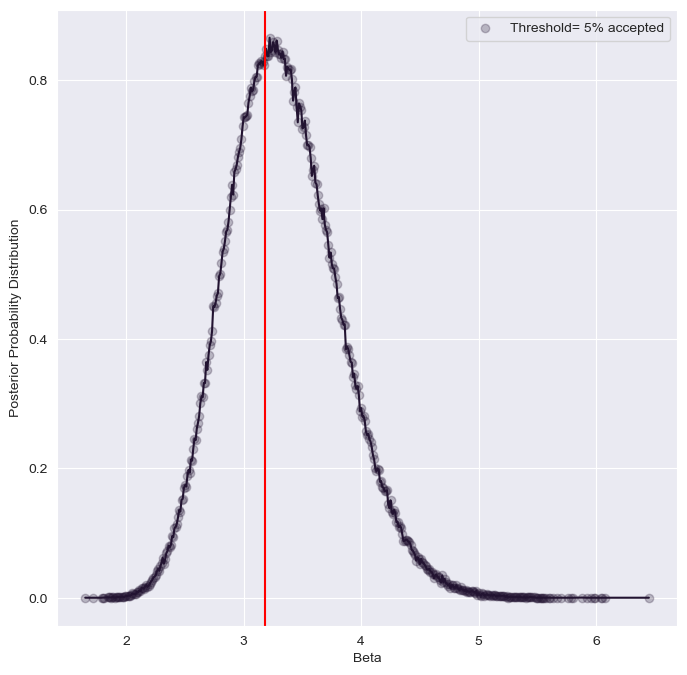

In [171]:
#Plot Graph!!!!
fig, ax0 = plt.subplots(figsize=(8, 8))
cols = sns.color_palette("rocket", n_colors=10)
for i in range(len(threshold_schedule)):
    thresh = ABC_rejection(threshold_schedule[i], graph_ABC)
    ploted = pd.DataFrame(thresh, columns=["Beta", "Counts"])
    bet_dis = ploted.groupby("Beta").count()
    plot_bet_dis = bet_dis[bet_dis["Counts"] != 0]
    max_scale = max(plot_bet_dis["Counts"])
    plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / max_scale
    area = np.trapz(plot_bet_dis["Counts"],dx=0.01)
    plot_bet_dis["Counts"] = plot_bet_dis["Counts"] / area
    spline = sp.interpolate.CubicSpline(plot_bet_dis.index, plot_bet_dis["Counts"])
    print(spline)
    ax0.scatter(bet_dis.index, plot_bet_dis["Counts"], label=f"Threshold= {reference[i]}% accepted", color=cols[i],
                alpha=0.25)
    ax0.plot(plot_bet_dis.index, spline(plot_bet_dis.index), color=cols[i])
if Typ == "simple":
    mles = np.genfromtxt("../../Data/R0_3/Fitted/MLE_b_3.csv")[0]
elif Typ == "simple_I0":
    mles = np.genfromtxt("../../Data/R0_3/Fitted/MLE_b_I0_1_3.csv")[0]
elif Typ == "meta":
    mles = np.genfromtxt("../../Data/R0_5/Fitted/MLE_meta_b.csv")
ax0.set_ylabel("Posterior Probability Distribution")
ax0.set_xlabel("Beta")
ax0.axvline(mles, color="red")
ax0.legend(bbox_to_anchor=(1, 1))
#ax0.set_ylim(0, 1.1)
#ax0.set_xlim(1,5)
fig.show()

In [172]:
#Take a cumulative distribution
sample_cum = plot_bet_dis.copy()
sample_cum["Cum_prob"] = 0
for i in range(len(sample_cum.index)):
    sample_cum.iloc[i,1] = np.trapz(plot_bet_dis.iloc[0:i+1,0],dx=0.01)

C:\Users\ollie\AppData\Local\Temp\ipykernel_20320\1980618581.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


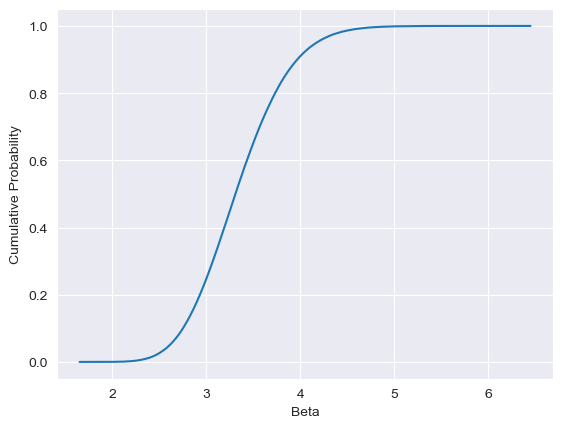

In [173]:
#plot cumulative distro
fig, ax0 = plt.subplots()
ax0.plot(sample_cum.index,sample_cum["Cum_prob"])
ax0.set_xlabel("Beta")
ax0.set_ylabel("Cumulative Probability")
fig.show()

In [177]:
rng = np.random.default_rng(1912)
trial_sample = beta_sampler(np.array(sample_cum.index),np.array(sample_cum["Cum_prob"]),rng,100000)

In [175]:
np.savetxt(f"../../Data/R0_3/Sims_SIR/Sampled_distros/Distro_{Typ}_{siz}.csv",trial_sample,delimiter=",")

C:\Users\ollie\AppData\Local\Temp\ipykernel_20320\293095607.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


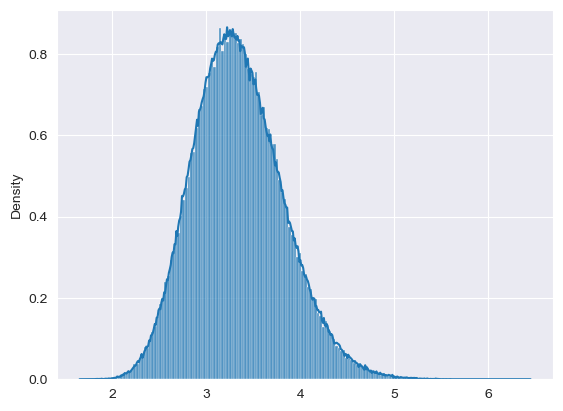

In [178]:
fig, ax0 = plt.subplots()
sns.histplot(trial_sample,ax=ax0,stat="density")
ax0.plot(plot_bet_dis.index, spline(plot_bet_dis.index))
fig.show()